# Initial Exploration, Data Preprocessing and Model Testing

**By: Sebastian Rosales**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import altair as alt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay, precision_score, recall_score, roc_curve, roc_auc_score, precision_recall_curve, auc

## Loading Data and Initial Exploration

In [ ]:
#Load raw dataset
data = pd.read_csv("/content/drive/MyDrive/DS207 Final Project/heart_failure_clinical_records_dataset.csv")
data.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [ ]:
#Check data types
data.dtypes

,0
age,float64
anaemia,int64
creatinine_phosphokinase,int64
diabetes,int64
ejection_fraction,int64
high_blood_pressure,int64
platelets,float64
serum_creatinine,float64
serum_sodium,int64
sex,int64


In [ ]:
#Check null values
data.isna().sum()

,0
age,0
anaemia,0
creatinine_phosphokinase,0
diabetes,0
ejection_fraction,0
high_blood_pressure,0
platelets,0
serum_creatinine,0
serum_sodium,0
sex,0


In [ ]:
#Check duplicates
data.duplicated().sum()

0

In [ ]:
#Plot class distribution
alt.Chart(data).mark_bar().encode(
    alt.X("DEATH_EVENT:N", title = "Death Event"),
    y=alt.Y('count()')
).properties(width = 500, title = "Class Distribution")

alt.Chart(...)

In [ ]:
#Collect quantitative columns
columns = (data.nunique() > 2).reset_index()
columns.columns = ["Column", "Value"]
quant_columns = columns[columns.Value == True].Column.values
data_quant = data[quant_columns]

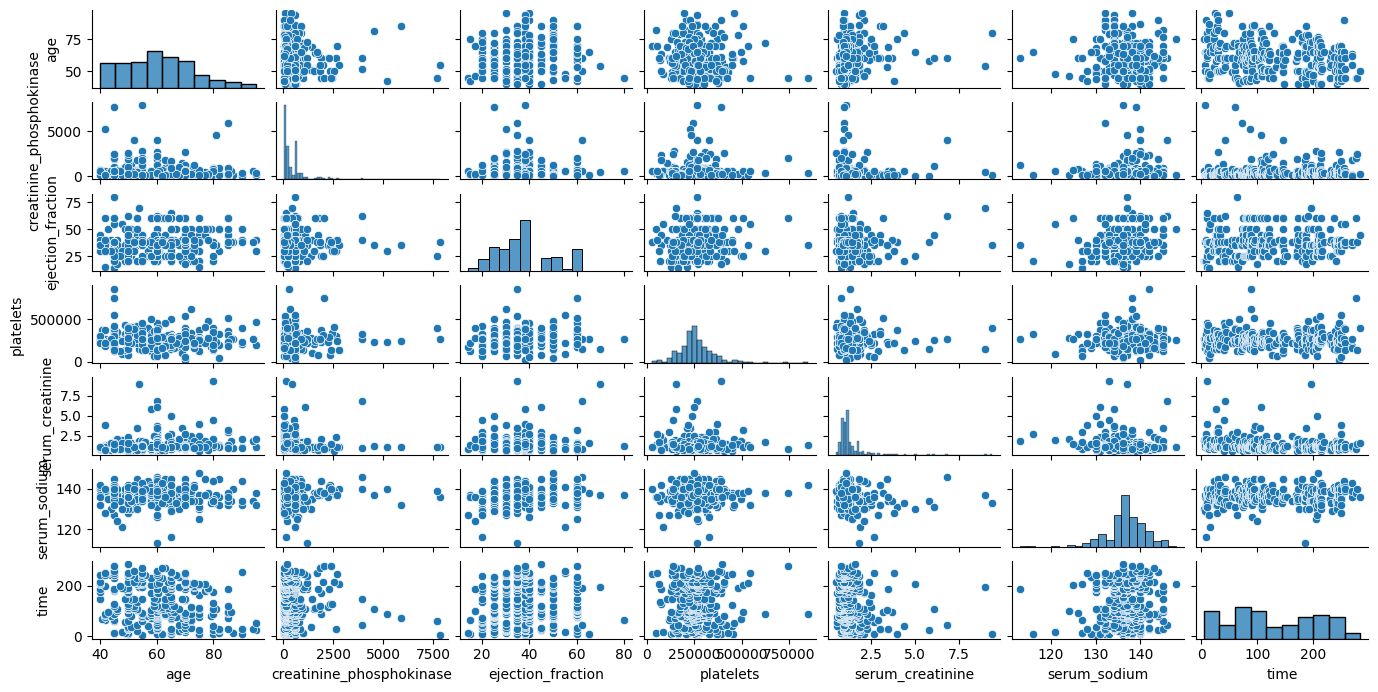

In [ ]:
#Plot pariplot for quantitative data
sns.pairplot(data_quant, aspect= 2, height= 1)

<Axes: >

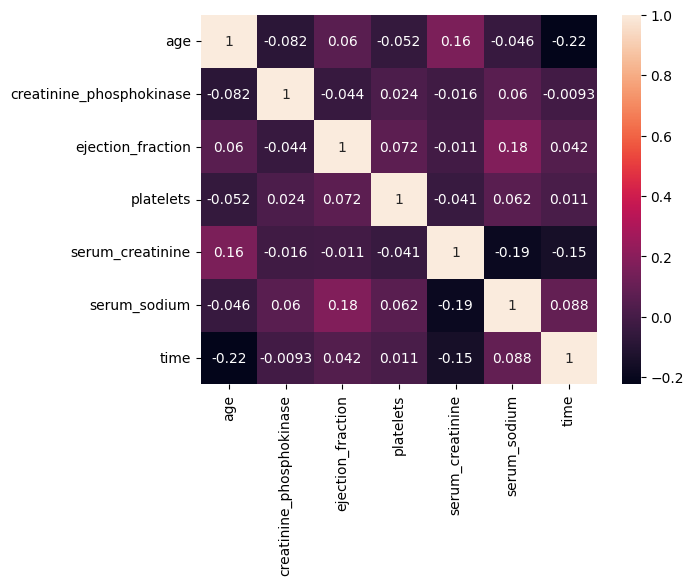

In [ ]:
#Plot correlation matrix
corr = data_quant.corr()
sns.heatmap(corr, annot = True)

- From both plots above we can see that there aren't any clear correlations between all of the quantitative features we are interested in

## Preprocessing

In [ ]:
#Shuffle data

#Changed from 11 to 27 to test robustness of models
np.random.seed(11)
indices = np.arange(data.shape[0])
shuffled_indices = np.random.permutation(indices)
shuffled_data = data.iloc[shuffled_indices]

#Define X and y
X = shuffled_data.drop(columns = ['DEATH_EVENT'])
y = shuffled_data['DEATH_EVENT']

#Split data into train, test and validation
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=.8 ,random_state=1234)

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, train_size=.75 ,random_state=1234)

In [ ]:
#Standardize quantitative data
quant_columns = ['age', 'creatinine_phosphokinase', 'ejection_fraction', 'platelets', 'serum_creatinine', 'serum_sodium', 'time']

X_train_mean = X_train[quant_columns].mean()
X_train_std = X_train[quant_columns].std()

X_train[quant_columns] = (X_train[quant_columns] - X_train_mean)/ X_train_std
X_test[quant_columns] = (X_test[quant_columns] - X_train_mean)/ X_train_std
X_val[quant_columns] = (X_val[quant_columns] - X_train_mean)/ X_train_std

In [ ]:
#Look at training class distribution
y_train.value_counts()

,count
DEATH_EVENT,
0,121
1,58


## Model Testing

### Baseline Model

In [ ]:
def baseline_model(X = []):
  pred = np.zeros(shape = X.shape[0])
  return pred

In [ ]:
#Define binary crossentropy
def binary_crossentropy(actuals,predictions):
  sum = 0
  for i, pred in enumerate(predictions):
    sum += actuals.iloc[i]*np.log(np.where(pred == 0, 1e-16, pred)) + (1 - actuals.iloc[i])*np.log(1 - pred)
  return -sum/ predictions.shape[0]

In [ ]:
#Calculate train and validation accuracy
train_baseline_pred = baseline_model(X_train)
val_baseline_pred = baseline_model(X_val)
test_baseline_pred = baseline_model(X_test)

train_accuracy = accuracy_score(y_train, train_baseline_pred)
val_accuracy = accuracy_score(y_val, val_baseline_pred)
test_accuracy = accuracy_score(y_test, test_baseline_pred)
print(f"Baseline Train Accuracy: {train_accuracy}\nBaseline Val Accuracy: {val_accuracy}\nBaseline Test Accuracy: {test_accuracy}")

Baseline Train Accuracy: 0.6759776536312849
Baseline Val Accuracy: 0.6333333333333333
Baseline Test Accuracy: 0.7333333333333333


In [ ]:
train_loss = binary_crossentropy(y_train, train_baseline_pred)
val_loss = binary_crossentropy(y_val, val_baseline_pred)
print(f"Baseline Train Loss: {train_loss}\nBaseline Val Loss: {val_loss}")

Baseline Train Loss: 11.937424392728914
Baseline Val Loss: 13.508499212231731


Text(0.5, 1.0, 'Baseline Training Confusion Matrix')

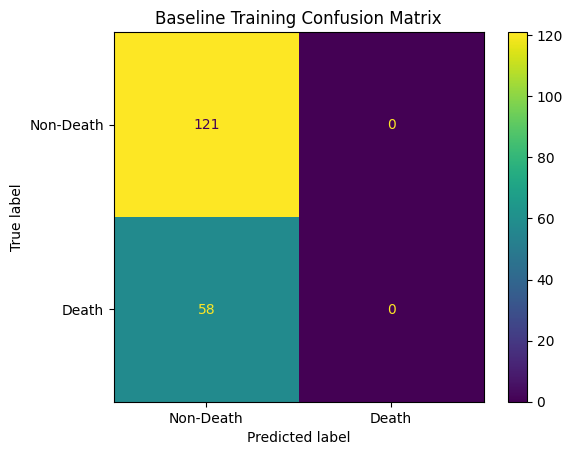

In [ ]:
#Plot confusion matrix
cm = confusion_matrix(y_train, train_baseline_pred)

ConfusionMatrixDisplay(cm, display_labels = ["Non-Death", "Death"]).plot()

plt.title("Baseline Training Confusion Matrix")

Text(0.5, 1.0, 'Baseline Test Confusion Matrix')

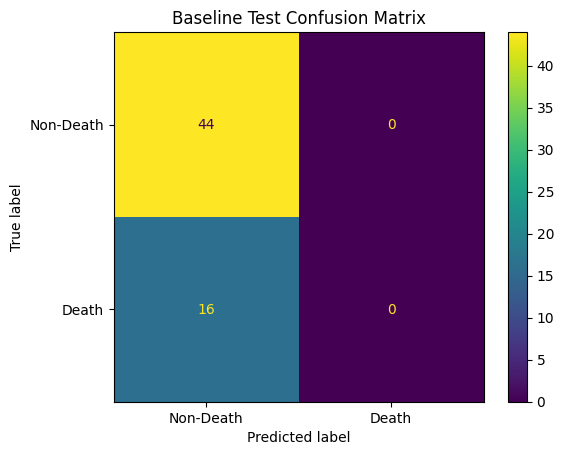

In [ ]:
#Plot confusion matrix
cm = confusion_matrix(y_test, test_baseline_pred)

ConfusionMatrixDisplay(cm, display_labels = ["Non-Death", "Death"]).plot()

plt.title("Baseline Test Confusion Matrix")

### Improved Model (Logistic Regression)

In [ ]:
def model_lr_build(num_units, learning_rate):
  model = tf.keras.Sequential()
  model.add(tf.keras.layers.Dense(
      units = num_units,
      use_bias = True
  ))

  model.add(tf.keras.layers.Dense(
      units = 1,
      activation = 'sigmoid'
  ))

  optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)

  model.compile(optimizer = optimizer, loss = 'binary_crossentropy', metrics = ['accuracy'])

  return model

In [ ]:
#Test different hyperparameters
epochs = [10,20,50,100]
batch_sizes = [10,30]

results = {}

for epoch in epochs:
  for batch_size in batch_sizes:
    hp_name = str(epoch) + '_' + str(batch_size)

    #Define Model
    model = model_lr_build(num_units = X_train.shape[1], learning_rate = 0.01)

    #Fit model with hyperparameters
    history = model.fit(X_train, y_train, validation_data= (X_val, y_val), epochs = epoch, batch_size= batch_size, verbose = 0)

    #Store results
    results[hp_name] = [history.history['accuracy'][-1], history.history['loss'][-1], history.history['val_accuracy'][-1], history.history['val_loss'][-1]]

In [ ]:
#Print model results
pd.DataFrame.from_dict(results, orient='index', columns = ['train accuracy', 'train loss', 'val accuracy', 'val loss'])

,train accuracy,train loss,val accuracy,val loss
10_10,0.821229,0.401885,0.833333,0.413902
10_30,0.826816,0.383150,0.783333,0.421806
20_10,0.832402,0.389399,0.800000,0.429795
20_30,0.837989,0.382027,0.800000,0.426440
50_10,0.832402,0.387152,0.800000,0.425800
50_30,0.837989,0.381743,0.800000,0.436508
100_10,0.837989,0.386983,0.783333,0.426735
100_30,0.837989,0.381056,0.800000,0.436770


- From the results above it seems like all the models are fairly close to each other regardless of the hyperparameters. However, it seems like the model with 50 epochs and 30 batch size has one of the higher training accuracies and one of the lowest training and validation losses.

In [ ]:
#Define the best model
lr_model = model_lr_build(num_units = X_train.shape[1], learning_rate = 0.01)

lr_model.fit(X_train, y_train, validation_data= (X_val, y_val), epochs = 50, batch_size= 30, verbose = 0)

In [ ]:
#Calculate testing accuracy
model.evaluate(X_test, y_test, verbose = 0)

[0.3677445650100708, 0.8166666626930237]

In [ ]:
#Generate test predictions
lr_test_pred = model.predict(X_test)
lr_test_pred = np.array([1 if i > .5 else 0 for i in lr_test_pred])

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


Text(0.5, 1.0, 'Improved Model Test Confusion Matrix')

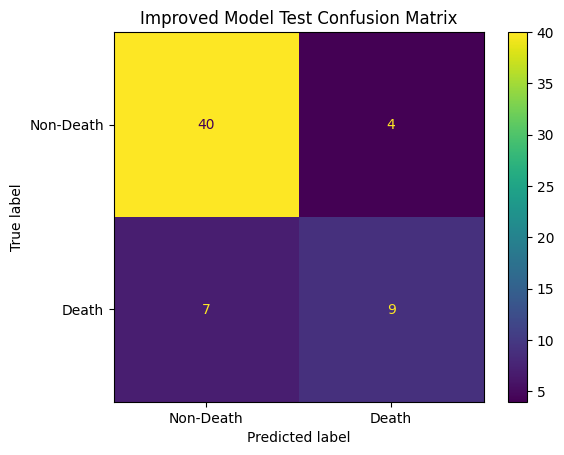

In [ ]:
#Plot confusion matrix
cm = confusion_matrix(y_test, lr_test_pred)

ConfusionMatrixDisplay(cm, display_labels = ["Non-Death", "Death"]).plot()

plt.title("Improved Model Test Confusion Matrix")

In [ ]:
#Calculate recall and precision
lr_precision = precision_score(y_test, lr_test_pred)
lr_recall = recall_score(y_test, lr_test_pred)

print(f"Improved Model Precision: {lr_precision}\nImproved Model Recall {lr_recall} ")

Improved Model Precision: 0.6923076923076923
Improved Model Recall 0.5625 


Text(0, 0.5, 'Recall')

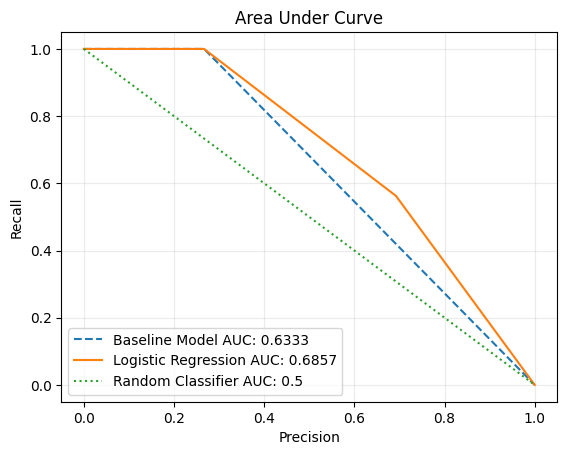

In [ ]:
#Calculate precisions and recalls
lr_precision, lr_recall, thresholds = precision_recall_curve(y_test, lr_test_pred)
base_precision, base_recall, thresholds = precision_recall_curve(y_test, test_baseline_pred)

#Add 0 values
base_precision= np.insert(base_precision, 0,0)
base_recall = np.insert(base_recall, 0,1)

lr_precision= np.insert(lr_precision, 0,0)
lr_recall = np.insert(lr_recall, 0,1)

#Plot models
plt.plot(base_precision, base_recall, label = f"Baseline Model AUC: {round(auc(base_recall, base_precision), 4)}", linestyle = 'dashed')
plt.plot(lr_precision, lr_recall, label = f"Logistic Regression AUC: {round(auc(lr_recall, lr_precision), 4)}")
plt.plot([0,1], [1,0], linestyle = 'dotted', label = f"Random Classifier AUC: {0.5}")

#Add formatting
plt.legend()
plt.grid(True, alpha = .25)
plt.title("Area Under Curve")
plt.xlabel("Precision")
plt.ylabel("Recall")

### Sequential Neural Network

In [ ]:
def ANN_build(num_units, learning_rate, hidden_layers = []):
  model = tf.keras.Sequential()
  model.add(tf.keras.layers.Dense(
      units = num_units,
      use_bias = True
  ))

  for neurons in hidden_layers:
    model.add(
        tf.keras.layers.Dense(
            units = neurons,
            activation = 'relu'
        )
    )

  model.add(tf.keras.layers.Dense(
      units = 1,
      activation = 'sigmoid'
  ))

  optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)

  model.compile(optimizer = optimizer, loss = 'binary_crossentropy', metrics = ['accuracy'])

  return model

In [ ]:
#Test different hyperparameters
epochs = [50,80,100]
batch_sizes = [128, 256]
hidden_layers_list = [[8], [16,4]]

ann_results = {}

for epoch in epochs:
  for batch_size in batch_sizes:
    for hidden_layers in hidden_layers_list:
      hp_name = str(epoch) + '_' + str(batch_size) + '_' + str(len(hidden_layers))

      #Define Model
      model = ANN_build(num_units = X_train.shape[1], learning_rate = 0.01, hidden_layers = hidden_layers)

      #Fit model with hyperparameters
      history = model.fit(X_train, y_train, validation_data= (X_val, y_val), epochs = epoch, batch_size= batch_size, verbose = 0)

      #Store results
      ann_results[hp_name] = [history.history['accuracy'][-1], history.history['loss'][-1], history.history['val_accuracy'][-1], history.history['val_loss'][-1]]

In [ ]:
#Print model results
pd.DataFrame.from_dict(ann_results, orient='index', columns = ['train accuracy', 'train loss', 'val accuracy', 'val loss'])

,train accuracy,train loss,val accuracy,val loss
50_128_1,0.877095,0.279084,0.816667,0.497846
50_128_2,0.910615,0.239833,0.850000,0.527175
50_256_1,0.837989,0.356548,0.783333,0.367119
50_256_2,0.916201,0.252209,0.816667,0.518232
80_128_1,0.932961,0.187360,0.783333,0.816403
80_128_2,0.949721,0.184206,0.783333,0.796286
80_256_1,0.910615,0.279634,0.766667,0.683023
80_256_2,0.955307,0.123443,0.816667,0.992682
100_128_1,0.938547,0.167351,0.850000,0.603278
100_128_2,0.994413,0.038923,0.800000,1.520579


- All around it seems like none of the models are an improvement over the logistic regression model. All the models seem to be overfitting to the training dataset and this is likely due to the low amount of training examples. Therefore, I will explore data augmentation next.

## Data Augmentation

In [ ]:
from sklearn.mixture import GaussianMixture

In [ ]:
#Get the best fitting Gaussian Mixture Model
bic_scores = []
k_values = range(1,15)

for k in k_values:
  gmm = GaussianMixture(n_components=k, random_state=27)
  gmm.fit(data)
  bic_scores.append(gmm.bic(data))

print(f"The most optimal amount of clusters is {np.array(bic_scores).argmin()}.")

The most optimal amount of clusters is 7.


In [ ]:
#Define most optimal Gaussian Mixture model
gmm = GaussianMixture(n_components=7, random_state=27).fit(data)

In [ ]:
#Generate 5000 samples using the Gaussian Mixture model
samples, cluster = gmm.sample(5000)

/usr/local/lib/python3.10/dist-packages/sklearn/mixture/_base.py:437: RuntimeWarning: covariance is not symmetric positive-semidefinite.
  rng.multivariate_normal(mean, covariance, int(sample))


In [ ]:
#Print out samples
df_samples = pd.DataFrame(samples, columns = data.columns)
df_samples.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,63.646240,0.029317,416.174526,1.111765,31.449593,1.569133,229119.060919,1.148682,140.625208,0.549222,0.602959,124.572550,-0.410840
1,73.300784,0.457760,332.555790,0.447306,23.212633,-0.218702,248955.564250,1.577470,134.452318,0.378002,0.311378,103.628703,0.538438
2,83.400739,0.736470,430.750125,0.455337,43.319210,0.673872,174228.048073,0.794649,133.500198,0.436561,0.669449,9.291533,0.197932
3,58.267089,-0.027939,152.787341,0.689759,42.976486,0.580333,250666.759914,0.571213,136.172204,0.742863,0.608422,176.288028,0.276657
4,76.697021,0.470736,439.400147,0.457193,47.720588,0.050565,216732.307654,1.173420,133.046502,0.678220,0.139536,137.013845,0.273008


In [ ]:
#Define a function to make binary columns binary for the samples
def make_binary(value):
  if value > 0.5:
    value = 1
  else:
    value = 0
  return value

In [ ]:
#Collect binary columns
binary_columns = ['anaemia', 'diabetes', 'high_blood_pressure','sex', 'smoking', 'DEATH_EVENT']

#Map function to appropriate columns
df_samples[binary_columns] = df_samples[binary_columns].map(make_binary)

#Standardize new samples
df_samples[quant_columns] = (df_samples[quant_columns] - X_train_mean)/ X_train_std

#Concat original training dataset
augmented_data = pd.concat((X_train.assign(DEATH_EVENT = y_train), df_samples))

augmented_data.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
45,-0.915576,0,-0.045822,1,0.077694,0,0.517217,0.539153,-0.339932,1,1,-1.264730,1
82,-0.043522,1,-0.534727,1,-1.011432,0,-0.711291,1.140264,-1.047466,0,0,-0.716673,1
97,0.828533,1,-0.551153,0,1.920831,0,-0.075485,-0.262329,-0.104088,0,0,-0.612281,0
213,-1.089987,1,-0.481586,1,-0.592537,1,-0.194025,0.238598,-1.519155,0,0,0.797008,1
194,-1.351603,0,-0.045822,0,-1.430327,1,-1.465638,0.238598,-0.339932,1,0,0.627371,1


In [ ]:
#Separate X and y for augmented data
X_aug = augmented_data.drop(columns = 'DEATH_EVENT')
y_aug = augmented_data['DEATH_EVENT']

## Model Testing with Augmented Data

### Logistic Regression

In [ ]:
#Test different hyperparameters
epochs = [50,100]
batch_sizes = [10,30, 128]

aug_lr_results = {}

for epoch in epochs:
  for batch_size in batch_sizes:
    hp_name = str(epoch) + '_' + str(batch_size)

    #Define Model
    model = model_lr_build(num_units = X_train.shape[1], learning_rate = 0.01)

    #Fit model with hyperparameters
    history = model.fit(X_aug, y_aug, validation_data= (X_val, y_val), epochs = epoch, batch_size= batch_size, verbose = 0)

    #Store results
    aug_lr_results[hp_name] = [history.history['accuracy'][-1], history.history['loss'][-1], history.history['val_accuracy'][-1], history.history['val_loss'][-1]]

In [ ]:
#Print model results
pd.DataFrame.from_dict(aug_lr_results, orient='index', columns = ['train accuracy', 'train loss', 'val accuracy', 'val loss'])

,train accuracy,train loss,val accuracy,val loss
50_10,0.766943,0.480811,0.850000,0.374806
50_30,0.767523,0.478719,0.833333,0.372907
50_128,0.768295,0.477510,0.850000,0.369926
100_10,0.769647,0.481395,0.850000,0.364701
100_30,0.766750,0.477784,0.850000,0.367204
100_128,0.768295,0.478695,0.850000,0.384744


- With the augmented dataset we can see that accuracy went up all around, and the model I originally chose has one of the best results with the highest validation accuracies and lowest validation losses.

### Sequential Neural Network

- Given that we now have more training examples and in the interest of run time I will focus solely on the two hidden layer model.

In [ ]:
#Test different hyperparameters
epochs = [80,100]
batch_sizes = [256]
hidden_layers_list = [[8], [16,4]]

aug_ann_results = {}

for epoch in epochs:
  for batch_size in batch_sizes:
    for hidden_layers in hidden_layers_list:
      hp_name = str(epoch) + '_' + str(batch_size) + '_' + str(len(hidden_layers))

      #Define Model
      model = ANN_build(num_units = X_train.shape[1], learning_rate = 0.01, hidden_layers = hidden_layers)

      #Fit model with hyperparameters
      history = model.fit(X_aug, y_aug, validation_data= (X_val, y_val), epochs = epoch, batch_size= batch_size, verbose = 0)

      #Store results
      aug_ann_results[hp_name] = [history.history['accuracy'][-1], history.history['loss'][-1], history.history['val_accuracy'][-1], history.history['val_loss'][-1]]

In [ ]:
#Print model results
pd.DataFrame.from_dict(aug_ann_results, orient='index', columns = ['train accuracy', 'train loss', 'val accuracy', 'val loss'])

,train accuracy,train loss,val accuracy,val loss
80_256_1,0.796486,0.437391,0.800000,0.339373
80_256_2,0.807299,0.406630,0.866667,0.276245
100_256_1,0.790886,0.437422,0.866667,0.302642
100_256_2,0.821008,0.400739,0.900000,0.256298


- We can see that the model with 2 hidden layers, 80 epochs, and 256 batch size performed the best with the highest validation accuracy and lowest validation loss.

In [ ]:
#Define best augmented model
aug_ann_model = ANN_build(X_aug.shape[1], 0.01, [16,4])
aug_ann_model.fit(X_aug, y_aug, validation_data= (X_val, y_val), epochs = 80, batch_size= 256, verbose = 0)

In [ ]:
#Print results
aug_ann_model.evaluate(X_test, y_test)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.8812 - loss: 0.2663


[0.257477730512619, 0.8999999761581421]

In [ ]:
#Collect predictions
aug_ann_test_pred = aug_ann_model.predict(X_test)
aug_ann_test_pred = np.array([1 if i > .5 else 0 for i in aug_ann_test_pred])

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


Text(0.5, 1.0, 'Augmented Neural Network Test Confusion Matrix')

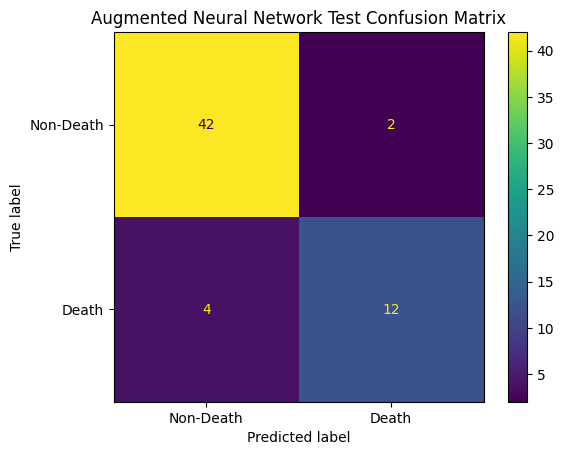

In [ ]:
#Plot confusion matrix
cm = confusion_matrix(y_test, aug_ann_test_pred)

ConfusionMatrixDisplay(cm, display_labels = ["Non-Death", "Death"]).plot()

plt.title("Augmented Neural Network Test Confusion Matrix")

In [ ]:
# Recall and Precision
aug_ann_precision = precision_score(y_test, aug_ann_test_pred)
aug_ann_recall = recall_score(y_test, aug_ann_test_pred)

print(f"Augmented ANN Model Precision: {aug_ann_precision}\nAugmented ANN Model Recall {aug_ann_recall} ")

Augmented ANN Model Precision: 0.8571428571428571
Augmented ANN Model Recall 0.75 


Text(0, 0.5, 'Recall')

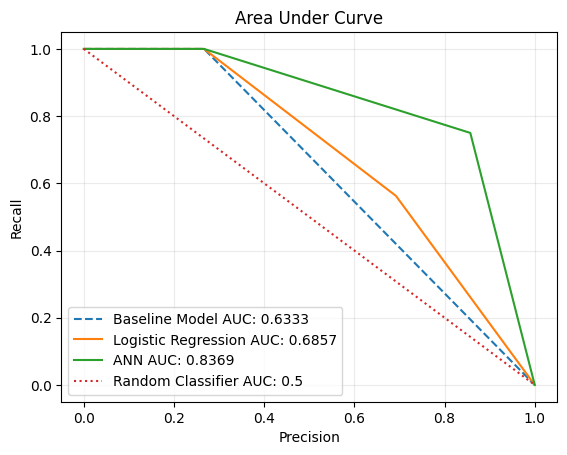

In [ ]:
#Calculate precisions and recalls
aug_ann_precision, aug_ann_recall, thresholds = precision_recall_curve(y_test, aug_ann_test_pred)
lr_precision, lr_recall, thresholds = precision_recall_curve(y_test, lr_test_pred)
base_precision, base_recall, thresholds = precision_recall_curve(y_test, test_baseline_pred)

#Add 0 values
base_precision= np.insert(base_precision, 0,0)
base_recall = np.insert(base_recall, 0,1)

lr_precision= np.insert(lr_precision, 0,0)
lr_recall = np.insert(lr_recall, 0,1)

aug_ann_precision= np.insert(aug_ann_precision, 0,0)
aug_ann_recall = np.insert(aug_ann_recall, 0,1)

#Plot models
plt.plot(base_precision, base_recall, label = f"Baseline Model AUC: {round(auc(base_recall, base_precision), 4)}", linestyle = 'dashed')
plt.plot(lr_precision, lr_recall, label = f"Logistic Regression AUC: {round(auc(lr_recall, lr_precision), 4)}")
plt.plot(aug_ann_precision, aug_ann_recall, label = f"ANN AUC: {round(auc(aug_ann_recall, aug_ann_precision), 4)}")
plt.plot([0,1], [1,0], linestyle = 'dotted', label = f"Random Classifier AUC: {0.5}")

#Add formatting
plt.legend()
plt.grid(True, alpha = .25)
plt.title("Area Under Curve")
plt.xlabel("Precision")
plt.ylabel("Recall")

## Export all data to keep it consistent across all models

In [ ]:
#Export augemented data
augmented_data.to_csv("augmented_train_data.csv", index = False)

In [ ]:
#Training data
(X_train.assign(DEATH_EVENT = y_train)).to_csv("train_data.csv", index = False)

In [ ]:
#Test data
(X_test.assign(DEATH_EVENT = y_test)).to_csv("test_data.csv", index = False)

In [ ]:
#Validation data
(X_val.assign(DEATH_EVENT = y_val)).to_csv("val_data.csv", index = False)